In [ ]:
# Load libraries
import io
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#Function to process/clean the tweets
pun = """!"$%&'()*+,-./:;<=>?[\]^`{|}~"""
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()


def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]", " ", words)
    
    # Remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", '', words, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+','', text)
    text = re.sub(r'\#\w+','', text)
    #remove numbers    
    #digits = '[0-9]'
    #text = re.sub(digits, '', text)
    #Remove emojis
    text = re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)'," ",text)
    text = text.lower().split()
    return " ".join(text)

def remove_numbers(text):
    """The function to removing all numbers"""
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

def remove_stopwords(review):
    """The function to removing stopwords"""
    text = [word.lower() for word in review.split() if word.lower() not in stop_words]
    return " ".join(text)

def get_lemmatize(text):
    """The function to apply lemmatizing"""
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving stanceDataset.csv to stanceDataset.csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['stanceDataset.csv']), header=0, index_col=0, sep=',',lineterminator='\r',encoding = 'unicode_escape')

In [ ]:
#print(dataset.shape)
print(dataset.head(5))

dataset['Tweet'] = dataset['Tweet'].astype(str)
dataset['Tweet'] = dataset['Tweet'].apply(clean_text)
print("done")
dataset['Tweet'] = dataset['Tweet'].apply(remove_stopwords)
dataset['Tweet'] = dataset['Tweet'].apply(remove_numbers)
dataset['Tweet'] = dataset['Tweet'].apply(get_lemmatize)
print(dataset[:5])

with open('stanceDataset_clean.csv', 'w') as f:
  dataset.to_csv(f)

        Target                                              Tweet   Stance
ï»¿ID                                                                     
\n1    Atheism  exalts shall humbled humbles shall exalted mat...  AGAINST
\n2    Atheism  rt prayerbullets remove nehushtan previous mov...  AGAINST
\n3    Atheism  brainman heidtjj benjaminlives sought truth so...  AGAINST
\n4    Atheism  god utterly powerless without human interventi...  AGAINST
\n5    Atheism  morality derived religion precedes christopher...  AGAINST
done
        Target                                              Tweet   Stance
ï»¿ID                                                                     
\n1    Atheism  exalts shall humbled humbles shall exalted mat...  AGAINST
\n2    Atheism  rt prayerbullets remove nehushtan previous mov...  AGAINST
\n3    Atheism  brainman heidtjj benjaminlives sought truth so...  AGAINST
\n4    Atheism  god utterly powerless without human interventi...  AGAINST
\n5    Atheism  mora

In [ ]:
dataset = pd.read_csv('stanceDataset_clean.csv', header=0, index_col=0)

Text(0.5, 1.0, 'Proportion Target Class')

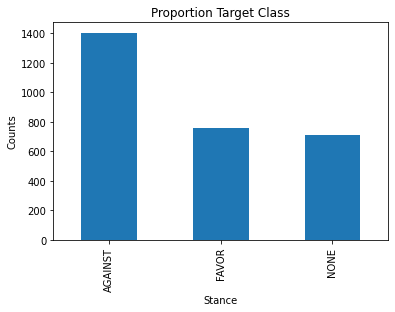

In [ ]:
import matplotlib.pyplot as plt
dataset["Stance"].value_counts().plot(kind='bar')
plt.xlabel("Stance")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

In [ ]:
against = dataset[dataset.Stance == "AGAINST"]
favor = dataset[dataset.Stance == "FAVOR"]
none = dataset[dataset.Stance == "NONE"]

against_words =[]

for data in against.Tweet:
    against_words.append(data) 
against_words = ' '.join(against_words)
against_words[:48]

favor_words =[]

for data in favor.Tweet:
    favor_words.append(data) 
favor_words = ' '.join(favor_words)
favor_words[:455]

none_words =[]

for data in none.Tweet:
    none_words.append(data) 
none_words = ' '.join(none_words)
none_words[:455]

'related news boko haram killed people last hr semst yeah think maybe word stopped mattering semst keep flowinz az da windz blend bend never break semst vicgreenaway hot air balloon pilot look horizon rise rather horizon always eye level semst narendramodi pmoindia politician office offer iftikar party waste tax payer money semst better chill retweets semst want give world hug huge huge hug human thofjuly everyone planetearth semst godless mom stereoty'

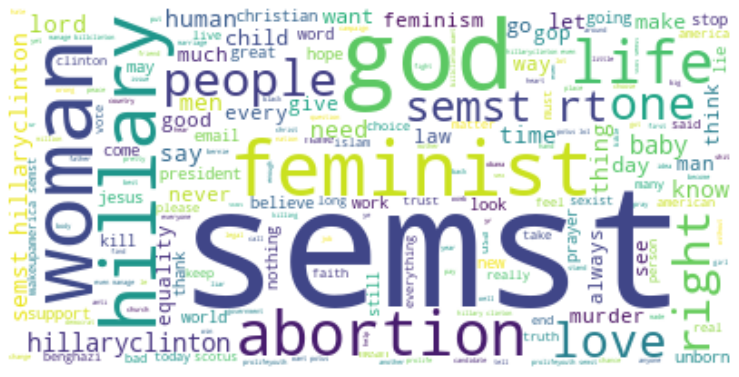

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=len(against_words))

wordcloud.generate(against_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

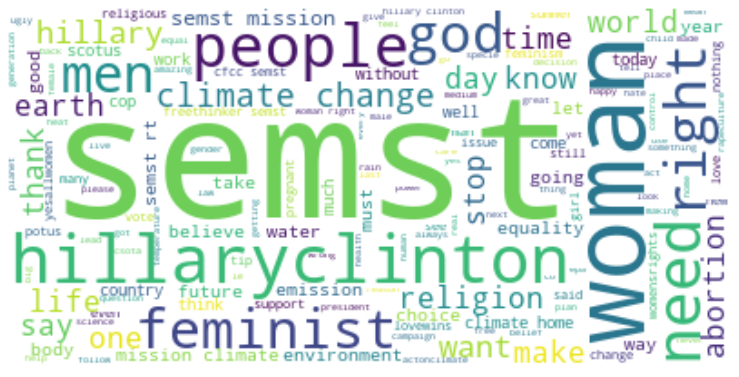

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=len(favor_words))

wordcloud.generate(favor_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

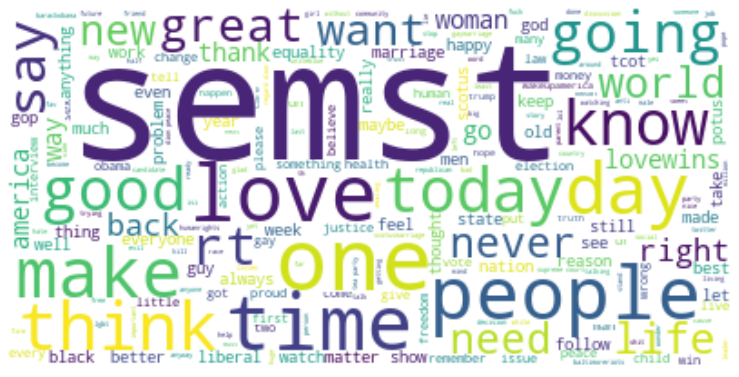

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=len(none_words))

wordcloud.generate(none_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
print("Classification Report")
print(classification_report(ytest, pred_y))

Classification Report
              precision    recall  f1-score   support

     AGAINST       0.63      0.74      0.68       291
       FAVOR       0.56      0.41      0.47       156
        NONE       0.49      0.46      0.47       129

    accuracy                           0.59       576
   macro avg       0.56      0.53      0.54       576
weighted avg       0.58      0.59      0.58       576



In [ ]:
print("Confusion Matrix")
print(confusion_matrix(ytest, pred_y))

Confusion Matrix
[[214  39  38]
 [ 69  64  23]
 [ 59  11  59]]


In [ ]:
# Shape
print(dataset.shape)

# Separate into input and output columns
X = dataset['Tweet'].values.astype('U')
y = dataset['Stance'].values.astype('U')

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
model = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                  ('tfidf', TfidfTransformer()),
                  ('model', LogisticRegression()), ])

# Create Logistic regression model
model.fit(X_train, y_train)

# Make predictions
ytest = np.array(y_test)
pred_y = model.predict(X_test)

# Evaluate predictions
print('Accuracy %s' % accuracy_score(pred_y, y_test), '%')
print(classification_report(ytest, pred_y))

# Save the model
with open("stance.pkl", "wb") as f:
    pickle.dump(model,f)

(2876, 3)
Accuracy 0.5850694444444444 %
              precision    recall  f1-score   support

     AGAINST       0.63      0.74      0.68       291
       FAVOR       0.56      0.41      0.47       156
        NONE       0.49      0.46      0.47       129

    accuracy                           0.59       576
   macro avg       0.56      0.53      0.54       576
weighted avg       0.58      0.59      0.58       576



In [ ]:
acc=accuracy_score(pred_y, y_test)
print('Accuracy', acc*100, '%')
#print('Accuracy %s' % accuracy_score(pred_y, y_test), '%')

Accuracy 58.50694444444444 %


In [ ]:
with open('stance.pkl', 'rb') as f:
        model = pickle.load(f)
s=["Trump is better than Hillary"]
a=model.predict(s)
print(s,':',a[0])


['Trump is better than Hillary'] : AGAINST
